In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import data_analysis_tools as tools
import re
import random

## BASELINE

In [2]:
OVERRIDE_OLD_FIXED = False
TEST = False

In [3]:
base_path = "C:/extincao-qpd/logs_good/"
baseline_paths = [
	# f"{base_path}baseline/4_ghosts_4_target_spread/",
	# f"{base_path}baseline/2_ghosts_0_target_spread/",
	# f"{base_path}baseline/2_ghosts_fixed_target_2_-5/",
	f"{base_path}baseline/2_ghosts_fixed_target_4_-5/",
]

neuroevolution_paths = [
	# f"{base_path}neuroevolution/battery_3_0/",
	
	# f"{base_path}neuroevolution/B1/",
	# f"{base_path}neuroevolution/B1-path-grading-hack/",
	# f"{base_path}neuroevolution/B1-path-grading-simple/",
	# f"{base_path}neuroevolution/B2/",
	# f"{base_path}neuroevolution/B3/",
	# f"{base_path}neuroevolution/NB4/",
	# f"{base_path}neuroevolution/NB4-path-grading/",
]

neat_paths = [
	# f"{base_path}NEAT/battery_3_0/",
	# f"{base_path}NEAT/saved_logs/no_speciation/",

	# f"{base_path}NEAT/history_size_100/B1/",
	# f"{base_path}NEAT/history_size_100/B1-path-grading-hack/",
	# f"{base_path}NEAT/history_size_100/B1-path-grading-simple/",
	# f"{base_path}NEAT/history_size_100/B2/",
	# f"{base_path}NEAT/history_size_100/B3/",
	# f"{base_path}NEAT/history_size_100/NB4/",
	# f"{base_path}NEAT/history_size_100/NB4-path-grading/",

	# f"{base_path}NEAT/saved_logs/speciated/B1/",
	# f"{base_path}NEAT/saved_logs/speciated/B1-path-grading-hack/",
	# f"{base_path}NEAT/saved_logs/speciated/B1-path-grading-simple/",
	# f"{base_path}NEAT/saved_logs/speciated/B2/",
	# f"{base_path}NEAT/saved_logs/speciated/B3/",
	# f"{base_path}NEAT/saved_logs/speciated/NB4/",
	# f"{base_path}NEAT/saved_logs/speciated/NB4-path-grading/",
]
selected_paths = baseline_paths + neuroevolution_paths + neat_paths

In [4]:
def prepare_data_fixed(path, selected_runs):
	for selected_run in selected_runs:
		this_path = f"{path}{selected_run}.data"
		if not os.path.exists(this_path + "_fixed") or OVERRIDE_OLD_FIXED:
			if not os.path.exists(this_path) or OVERRIDE_OLD_FIXED:
				#join data if necessary
				tools.join_data(this_path)
			tools.quote_gene(this_path)

def get_availiable_runs(filenames_list):
	selected_runs_set = set()
	for filename in filenames_list:
		found = re.findall("[0-9]+", filename)
		if len(found) > 0:
			selected_runs_set.add(found[0])
	return list(selected_runs_set)

def analyse_all_in_path(path):
	in_path_df_dict = dict()
	selected_runs = get_availiable_runs(os.listdir(path))
	prepare_data_fixed(path, selected_runs)
	errors = list()

	for run in selected_runs:
		this_baseline_mode = None
		this_ann_layers = None
		print(path, run)
		run_dict = dict()
		run_dict["run_id"] = run
		run_dict["path"] = path
		with open(f"{path}{run}.conf", 'r') as f:
			for line in f.readlines():
				if tools.ANN_MODE_STRING in line:
					this_mode = line.replace(tools.ANN_MODE_STRING, "")
					run_dict["mode"] = this_mode
				elif tools.ANN_LAYERS_STRING in line:
					this_layers = line.replace(tools.ANN_LAYERS_STRING, "")
					run_dict["layers"] = this_layers

		run_dict["df"], load_errors = tools.load_dataframe(path, run)
		in_path_df_dict[run] = run_dict
		errors.extend(load_errors)
		if TEST == True:
			return in_path_df_dict, errors

	return in_path_df_dict, errors


## Do it

C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/ 1675110905
Dataframe:  C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/1675110905.pd  loaded.
C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/ 1675110985
Dataframe:  C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/1675110985.pd  loaded.
C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/ 1675110942
Dataframe:  C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/1675110942.pd  loaded.
C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/ 1675111017
Dataframe:  C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/1675111017.pd  loaded.
C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/ 1675111001
Dataframe:  C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/1675111001.pd  loaded.
C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_-5/ 1675110956
Dataframe:  C:/extincao-qpd/logs_good/baseline/2_ghosts_fixed_target_4_

<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

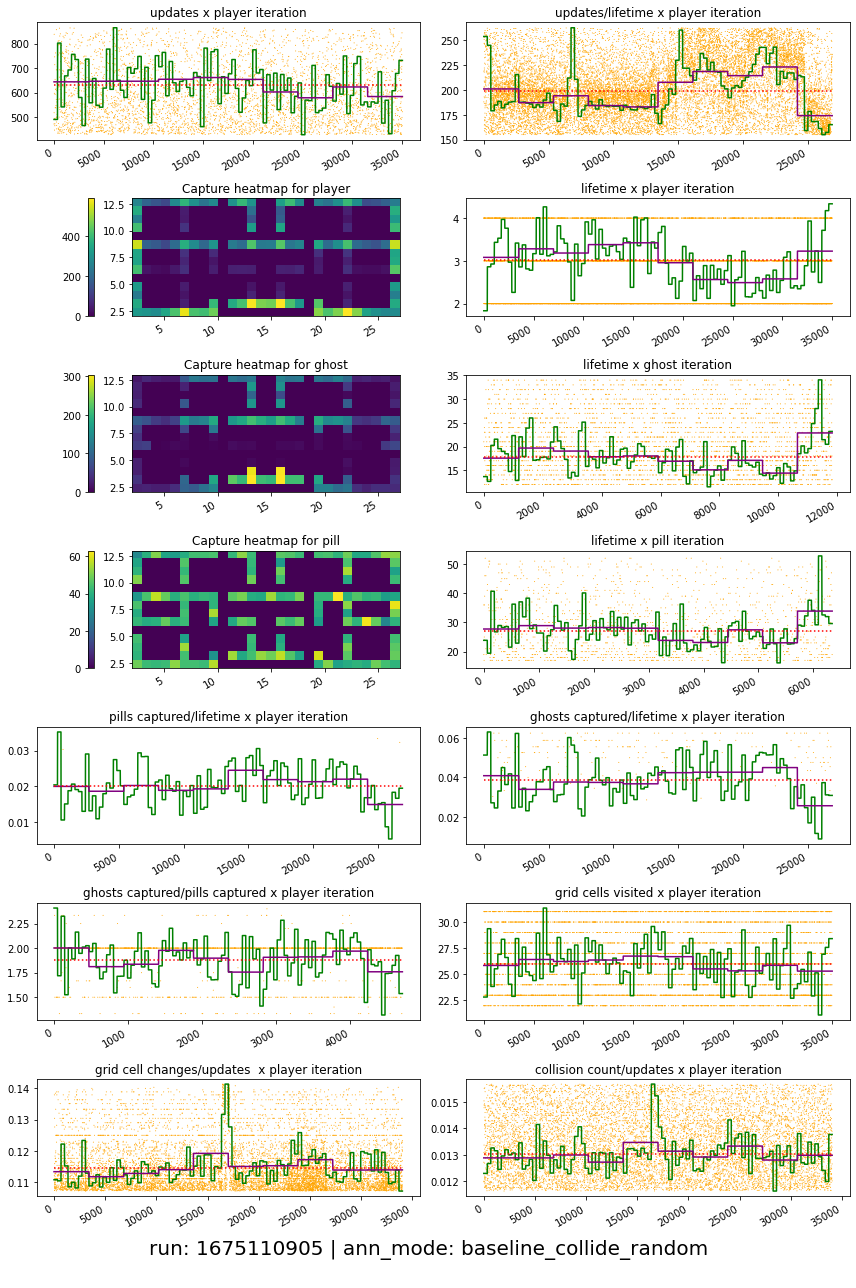

corr updates lifetime:  0.9811179377823231
corr updates/lifetime lifetime:  0.053970611125609476
corr updates/lifetime updates:  0.16835410039373552
corr updates/lifetime cell_visited:  0.26521376822240905
corr updates/lifetime cell changes:  0.16369237144611418
corr updates cells_visited:  0.8428967345500732
corr lifetime cells_visited:  0.8283627045961308
corr cells_visited cell changes:  0.8449828025306444
corr updates cell changes:  0.9988471030247073
corr lifetime cell changes:  0.9823023457071839


<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

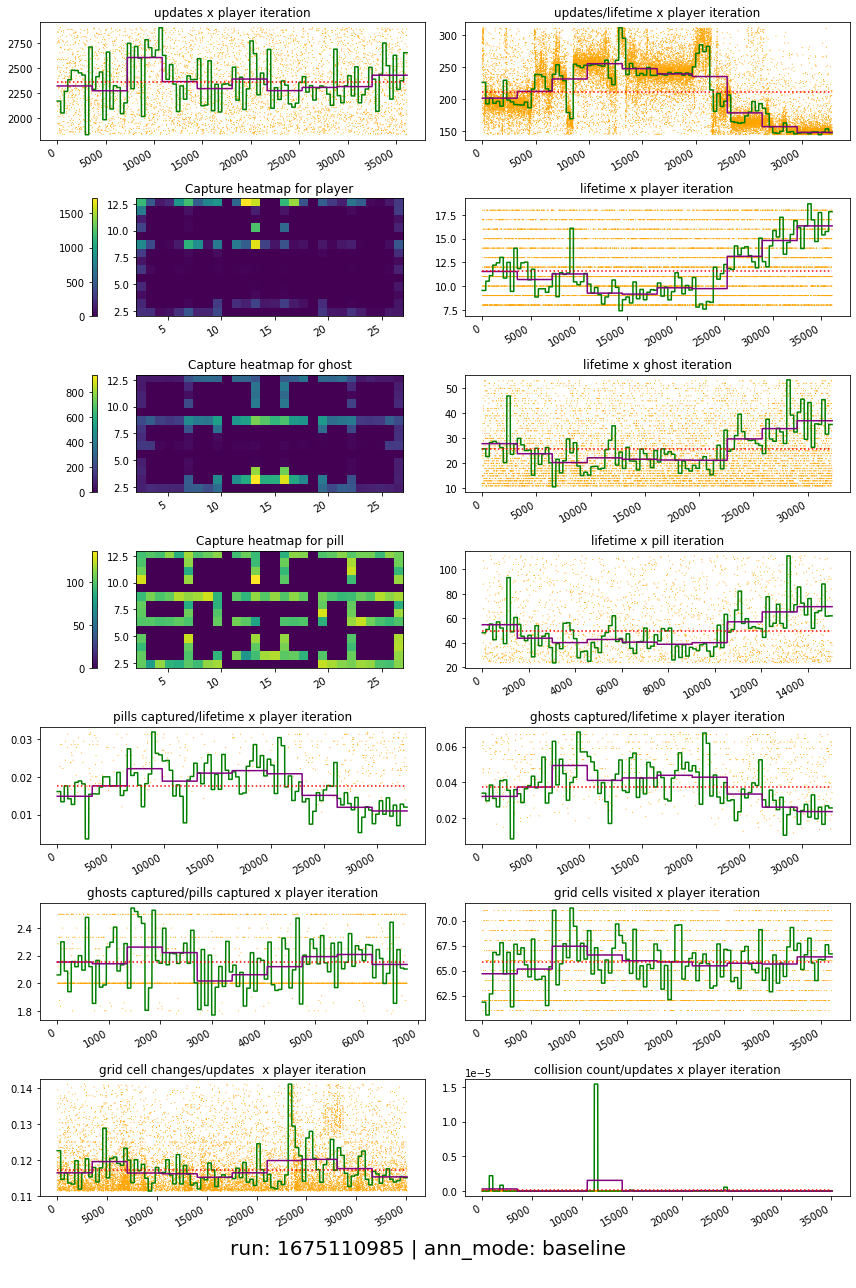

corr updates lifetime:  0.957630279410772
corr updates/lifetime lifetime:  -0.1058502141424098
corr updates/lifetime updates:  0.056809821415146115
corr updates/lifetime cell_visited:  0.1456216206134826
corr updates/lifetime cell changes:  0.053739540906473184
corr updates cells_visited:  0.6775534736739649
corr lifetime cells_visited:  0.6501917453321469
corr cells_visited cell changes:  0.6777035835009484
corr updates cell changes:  0.9985050171190588
corr lifetime cell changes:  0.957796583951571


<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

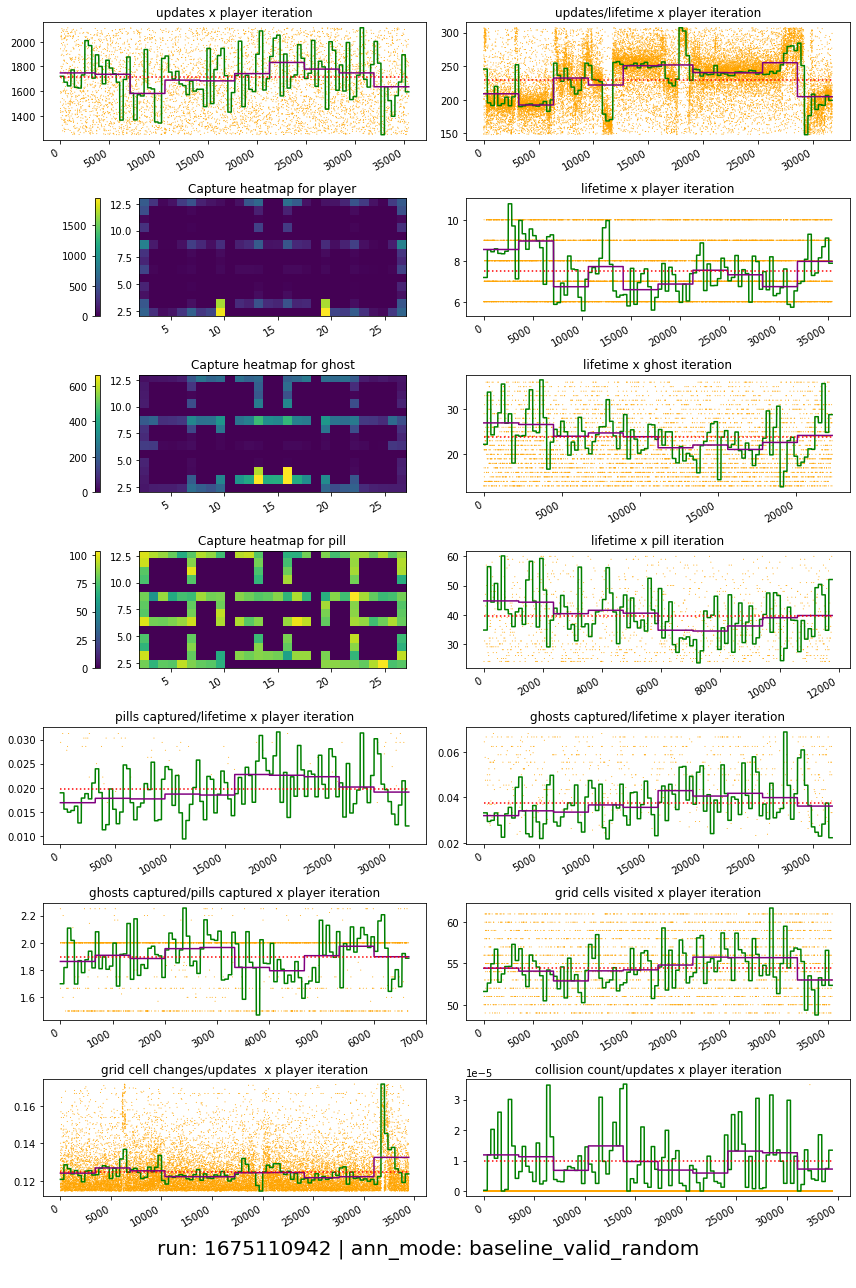

corr updates lifetime:  0.9771279088079184
corr updates/lifetime lifetime:  -0.026033929007390558
corr updates/lifetime updates:  0.08563721360385604
corr updates/lifetime cell_visited:  0.1615523156948909
corr updates/lifetime cell changes:  0.07600108092273958
corr updates cells_visited:  0.7325382070649205
corr lifetime cells_visited:  0.7155327534182776
corr cells_visited cell changes:  0.739361736241573
corr updates cell changes:  0.9977768897980476
corr lifetime cell changes:  0.9807247155352958


<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

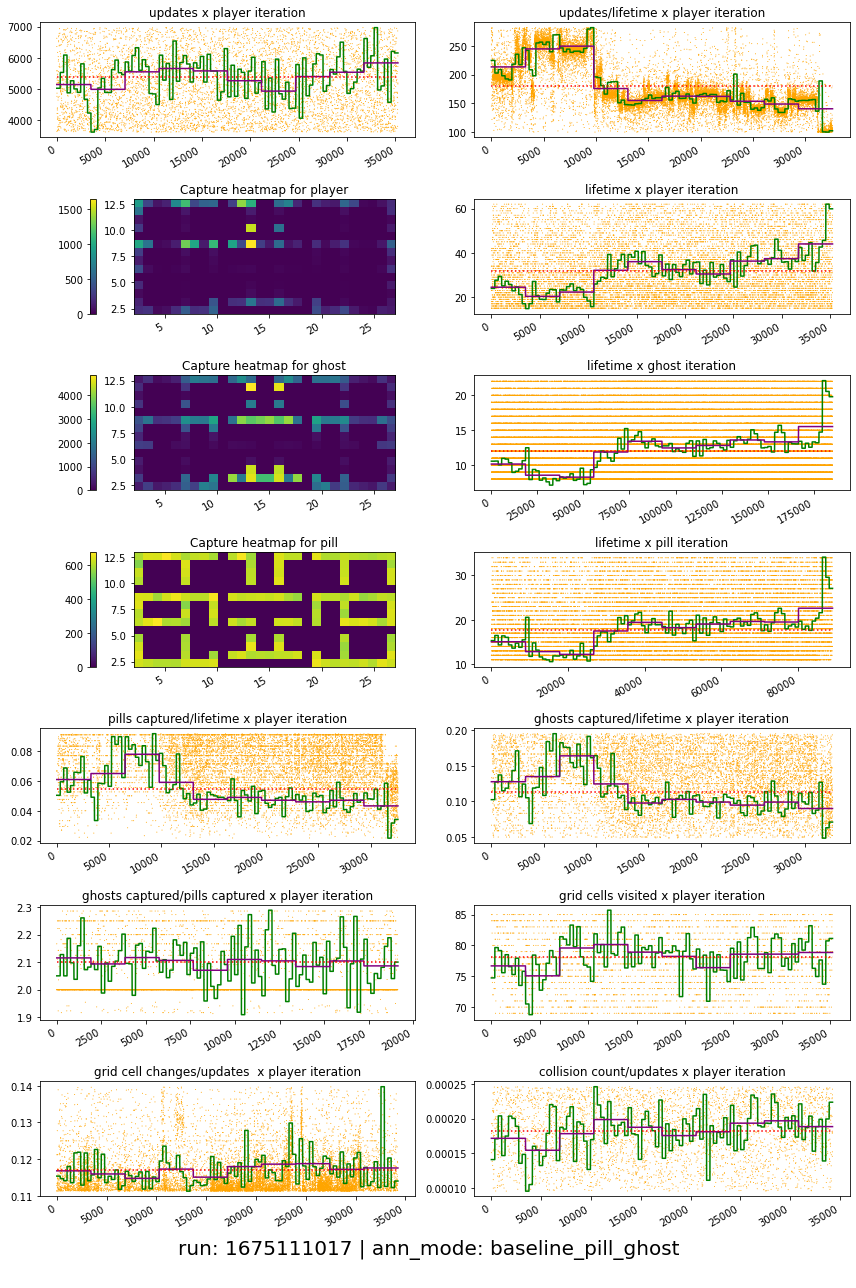

corr updates lifetime:  0.9559051991793418
corr updates/lifetime lifetime:  -0.1433009031413727
corr updates/lifetime updates:  0.020546165915046075
corr updates/lifetime cell_visited:  0.09494447965386853
corr updates/lifetime cell changes:  0.01650524681203703
corr updates cells_visited:  0.6670288768024798
corr lifetime cells_visited:  0.6376084408160333
corr cells_visited cell changes:  0.6680662535480745
corr updates cell changes:  0.998606531022097
corr lifetime cell changes:  0.9565982511384524


<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

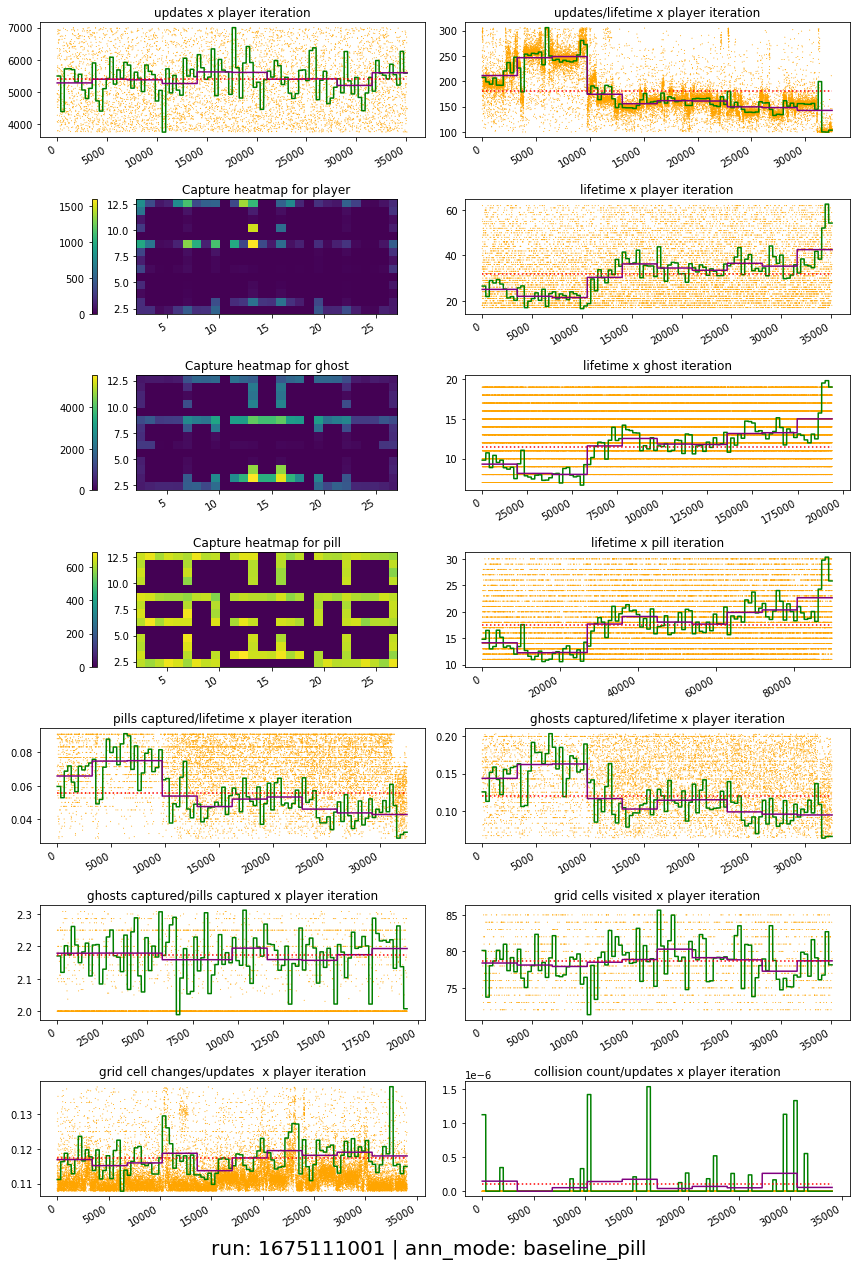

corr updates lifetime:  0.9540714305364667
corr updates/lifetime lifetime:  -0.13564011224214062
corr updates/lifetime updates:  0.031912408210700724
corr updates/lifetime cell_visited:  0.10208596302300185
corr updates/lifetime cell changes:  0.027116106683370562
corr updates cells_visited:  0.670368349882746
corr lifetime cells_visited:  0.6372492370499031
corr cells_visited cell changes:  0.6710925401429878
corr updates cell changes:  0.9986284060014963
corr lifetime cell changes:  0.9545257010961327


<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

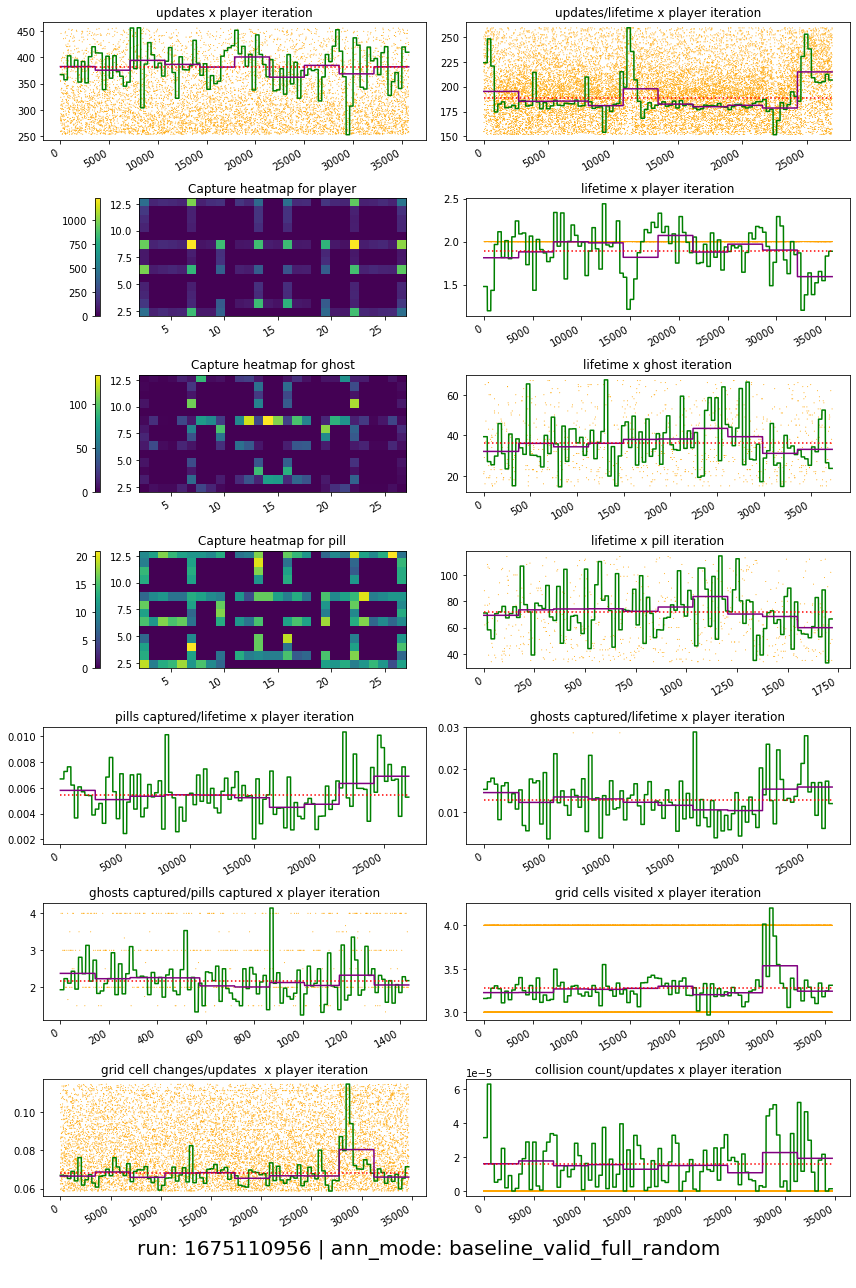

corr updates lifetime:  0.9808790460608733
corr updates/lifetime lifetime:  0.04701185962313283
corr updates/lifetime updates:  0.1777150169982675
corr updates/lifetime cell_visited:  0.20635952290362075
corr updates/lifetime cell changes:  0.16315066771578352
corr updates cells_visited:  0.738395702245647
corr lifetime cells_visited:  0.730652450568794
corr cells_visited cell changes:  0.7681002350273388
corr updates cell changes:  0.8355656233914224
corr lifetime cell changes:  0.8265066141592184


<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

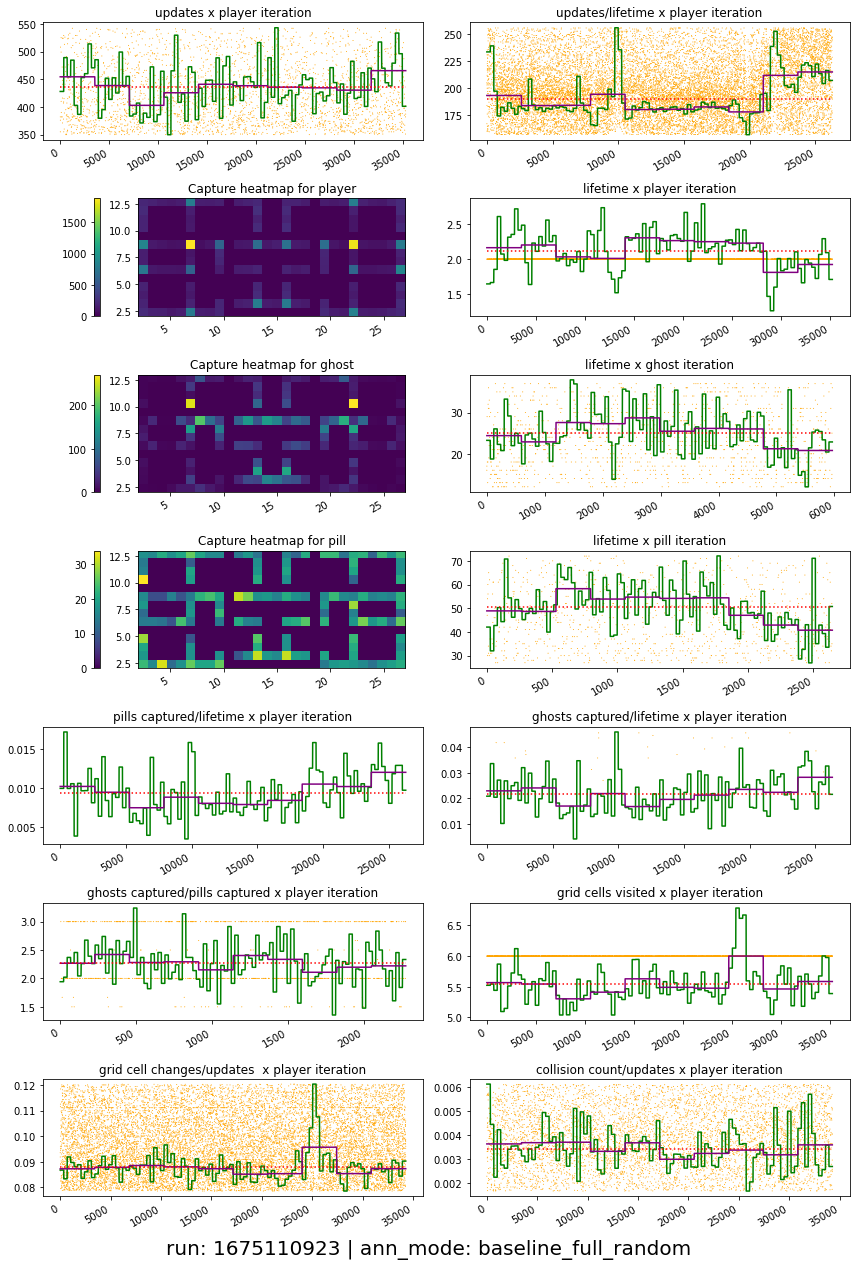

corr updates lifetime:  0.9803604812114505
corr updates/lifetime lifetime:  0.07340994301932817
corr updates/lifetime updates:  0.1969035036477067
corr updates/lifetime cell_visited:  0.22786119013028275
corr updates/lifetime cell changes:  0.18584659907474788
corr updates cells_visited:  0.8397271728880055
corr lifetime cells_visited:  0.8306226739907334
corr cells_visited cell changes:  0.8538791366112698
corr updates cell changes:  0.9292204453746243
corr lifetime cell changes:  0.914297168631765


<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

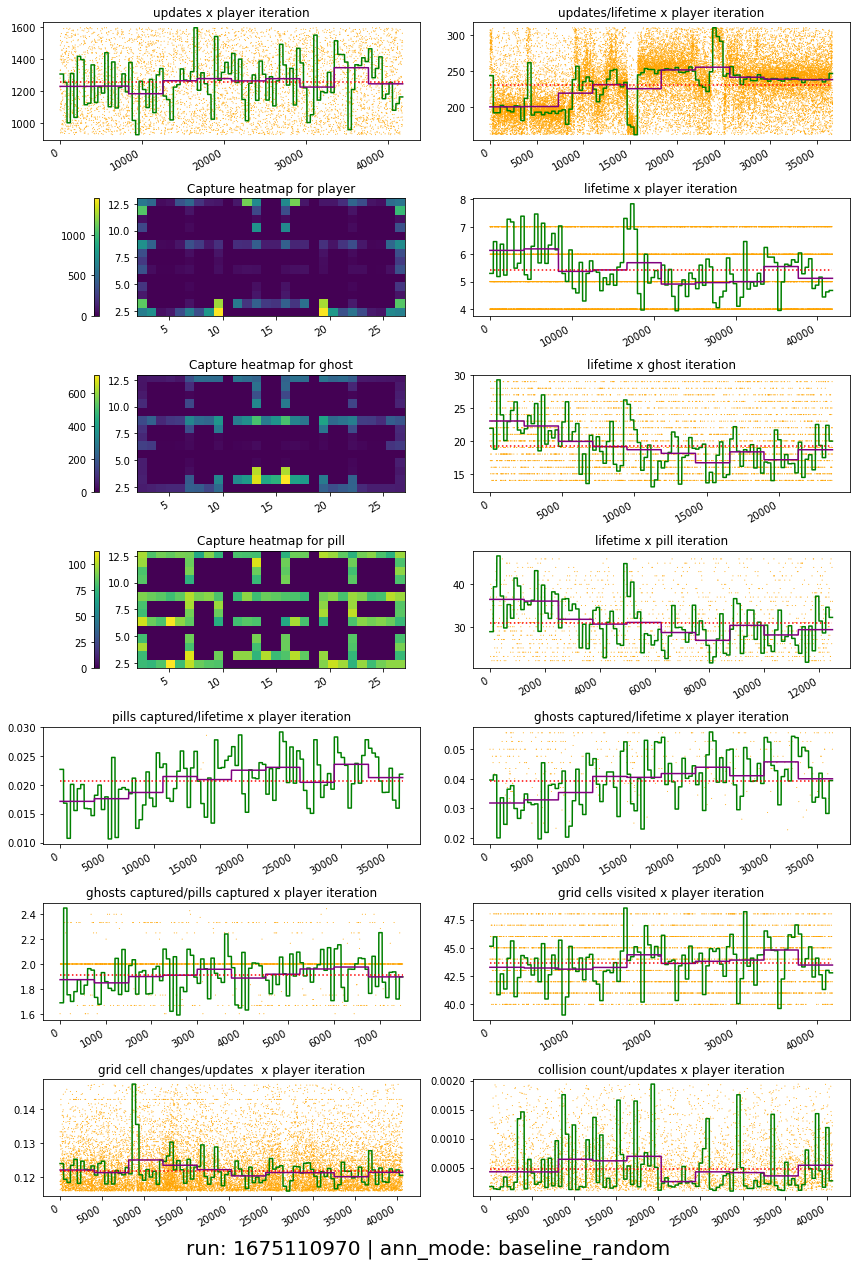

corr updates lifetime:  0.9813791661323674
corr updates/lifetime lifetime:  -0.013199208773725631
corr updates/lifetime updates:  0.08342609161900752
corr updates/lifetime cell_visited:  0.16521709420353548
corr updates/lifetime cell changes:  0.07901178120982669
corr updates cells_visited:  0.7609153068638908
corr lifetime cells_visited:  0.7514225248505759
corr cells_visited cell changes:  0.7634717437255083
corr updates cell changes:  0.999325010099917
corr lifetime cell changes:  0.9831056623934162
Path count:  1
Run count:  8
Errors:
[]


In [5]:
errors = list()
paths_dict = dict()
for path in selected_paths:
	paths_dict[path], load_errors = analyse_all_in_path(path)
	errors.extend(load_errors)
	if TEST == True:
		break

# run count
run_count = 0
for index, path_dict in paths_dict.items():
	for _, run_dict in path_dict.items():
		run_count = run_count + 1
		errors.extend(tools.generate_run_report_from_dict(run_dict))

print("Path count: ", len(paths_dict.keys()))
print("Run count: ", run_count)
print("Errors:\n" + str(errors))